# Linear regression with various methods
This is a very simple example of using two scipy tools for linear regression.
* Scipy.Polyfit
* Stats.linregress
* Optimize.curve_fit
* numpy.linalg.lstsq
* statsmodels.OLS
* Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse
* sklearn.linear_model.LinearRegression

## Import libraries

In [17]:
from scipy import stats, optimize
from numpy import linspace, polyval, polyfit, sqrt
from numpy.random import randn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

## Generate random data of a sufficiently large size

In [18]:
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

### Draw few random sample points and plot

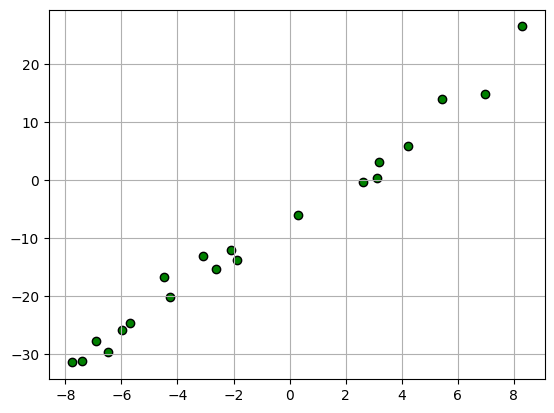

In [19]:
xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

## Method: Numpy.Polyfit

In [20]:
#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 0.7997925281524658 seconds


## Method: Stats.linregress

In [21]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.06009650230407715 seconds


## Method: Optimize.curve_fit

In [22]:
def flin(t,a,b):
    result = a*t+b
    return(result)

In [23]:
t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 0.38066887855529785 seconds


## Method: numpy.linalg.lstsq

In [24]:
t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn, rcond=None)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err[0]))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 3.000
Time taken: 0.1921989917755127 seconds


## Method: Statsmodels.OLS

In [25]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))      

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.5537190437316895 seconds


In [26]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.888e+36
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:21:33   Log-Likelihood:             1.5031e+08
No. Observations:             5000000   AIC:                        -3.006e+08
Df Residuals:                 4999998   BIC:                        -3.006e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000   9.52e-18  -6.83e+17      0.0

## Analytic solution using Moore-Penrose pseudoinverse

In [27]:
t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix)) 

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.2550225257873535 seconds


## Analytic solution using simple multiplicative matrix inverse

In [28]:
t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv)) 

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.0611882209777832 seconds


## Method: sklearn.linear_model.LinearRegression

In [29]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear)) 

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.24246573448181152 seconds


## Bucket all the execution times in a list and plot

In [30]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

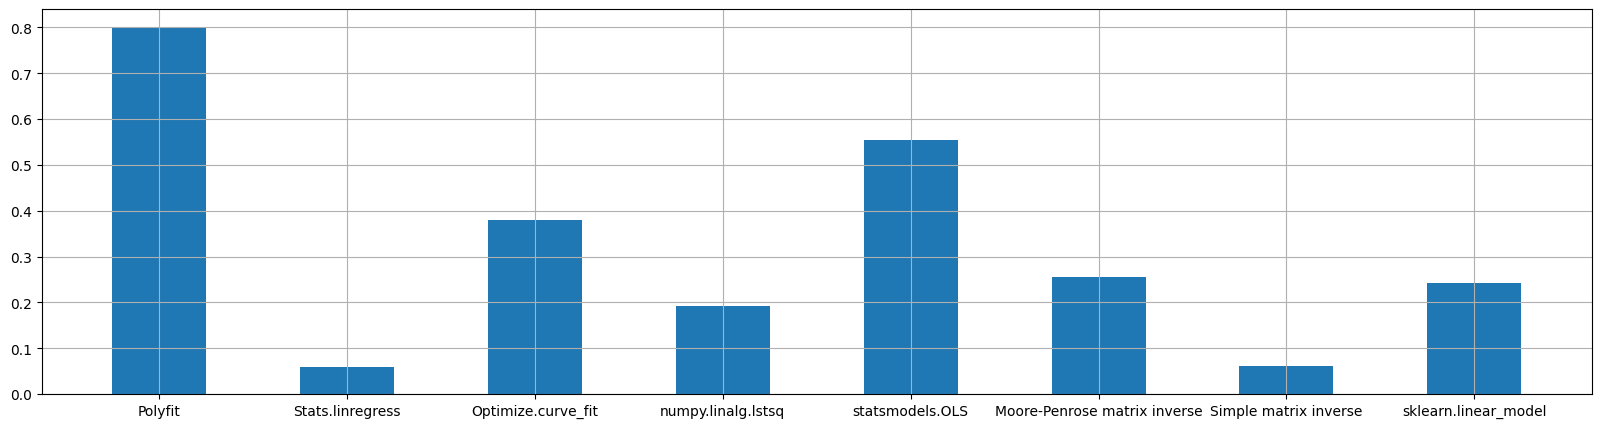

In [32]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()

In [33]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [35]:
#time_dict={'Polyfit':[],'Stats.lingress':[],'Optimize.curve_fit':[],'linalg.lstsq':[],'statsmodels.OLS':[],
          #'Moore-Penrose matrix inverse':[],'Simple matrix inverse':[], 'sklearn.linear_model':[]}

l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn, rcond=None)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)

100%|██████████| 25/25 [00:21<00:00,  1.18it/s]


In [36]:
df = pd.DataFrame(data=time_dict)
df

,Polyfit,Stats.lingress,Optimize.curve_fit,linalg.lstsq,statsmodels.OLS,Moore-Penrose matrix inverse,Simple matrix inverse,sklearn.linear_model
0,3.103495,1.171589,2.260208,1.807928,6.809235,2.288580,0.367403,2.408504
1,2.617359,1.064777,2.033710,1.064301,4.850149,1.350880,0.327110,2.826214
2,3.221989,1.190662,2.446651,1.303196,7.189274,4.955769,0.930309,3.878117
3,5.699396,1.597881,3.544092,1.836061,39.496422,5.647659,4.368544,4.986763
4,6.965160,1.813412,4.311562,2.418280,11.599064,5.614281,0.864506,5.736113
5,8.627176,2.127886,5.356312,2.998352,14.382839,6.701708,1.113415,6.926537
6,9.553194,2.337217,6.761312,3.840446,19.023418,7.359266,1.804352,8.671284
7,13.630152,3.003597,9.244680,5.067587,23.076057,8.782387,1.842976,10.845900
8,16.496181,3.651857,11.679649,6.379843,26.403189,9.231091,2.145052,14.415264
9,18.553972,4.222870,15.897989,7.998943,30.849218,12.533426,2.849579,17.316580


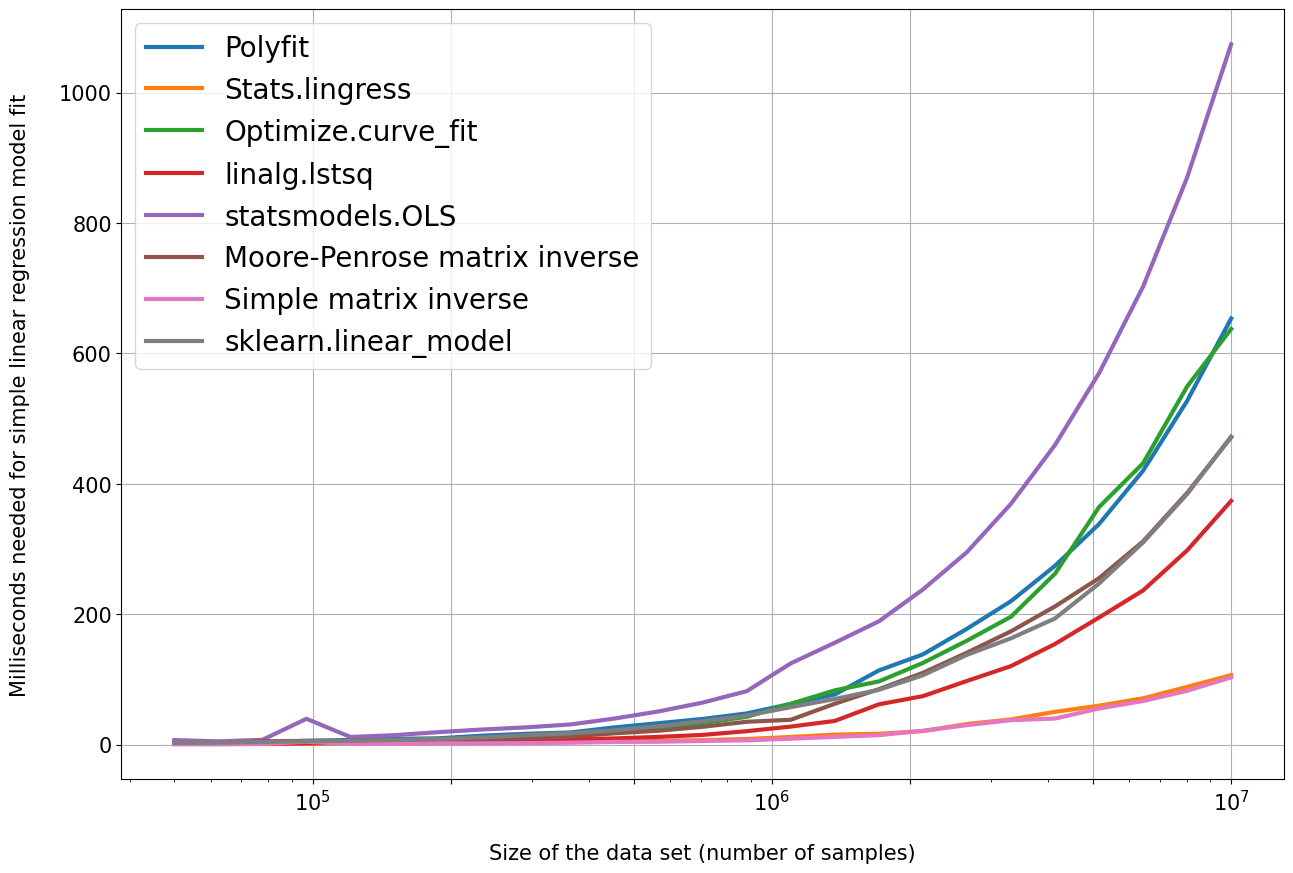

In [37]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [38]:
a1=df.iloc[n_levels-1]

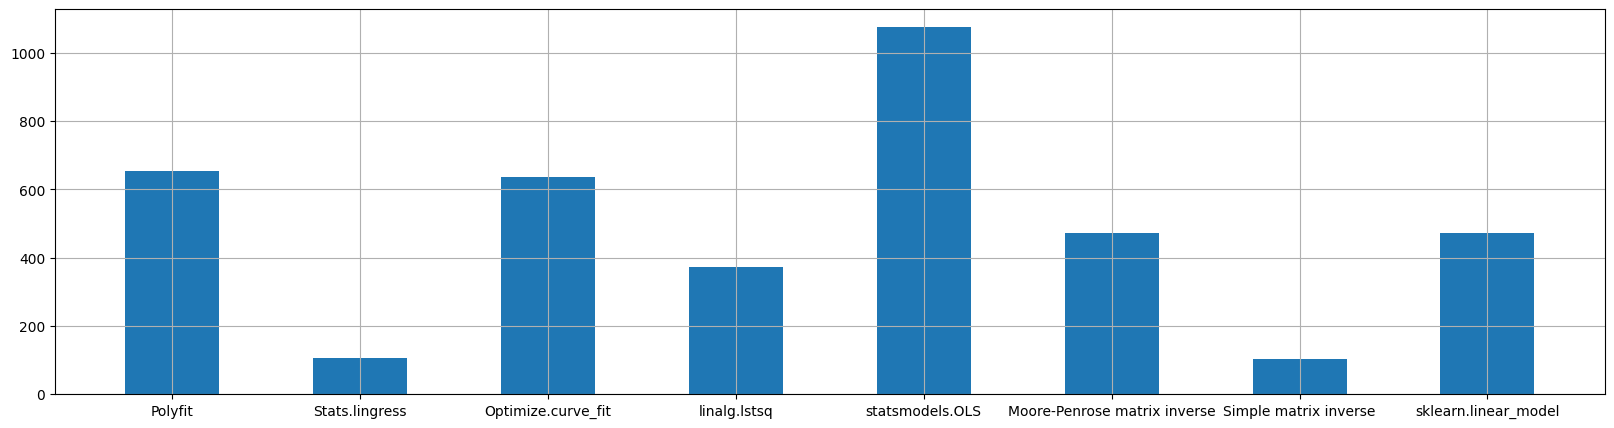

In [40]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(x=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()